In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:
project_name ='05-cifar10-cnn'

In [3]:
#data set download
dataset_url ="https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url,'.')

100%|██████████| 135107811/135107811 [00:03<00:00, 43104484.28it/s]


In [4]:
# Extract from achive
with tarfile.open('./cifar10.tgz','r:gz') as tar:
  tar.extractall(path='./data')

In [5]:
data_dir ='./data/cifar10'
print(os.listdir(data_dir))

classes = os.listdir(data_dir+"/train")
print(classes)

['train', 'test']
['automobile', 'horse', 'truck', 'deer', 'cat', 'airplane', 'ship', 'bird', 'dog', 'frog']


In [6]:
# we want to the no of images in the ariplanes
#
airplane_files = os.listdir(data_dir+"/train/airplane")
print(f'No of training examples for ariplanes : {len(airplane_files)}')

print(airplane_files[:5])

No of training examples for ariplanes : 5000
['0231.png', '1803.png', '2690.png', '3815.png', '1204.png']


In [7]:
ship_test_files = os.listdir(data_dir+"/test/ship")
print(f'No of test examples for ship_test_files : {len(ship_test_files)}')

print(ship_test_files[:5])

No of test examples for ship_test_files : 1000
['0231.png', '0390.png', '0909.png', '0344.png', '0243.png']


### ImageFolder
We can use the ImageFolder class from TorchVision to load data as Pytorch tensors

In [8]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor


In [9]:
dataset = ImageFolder(data_dir+'/train',transform=ToTensor())

In [10]:
img,label = dataset[1]
print(img.shape,label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.4941, 0.4784, 0.4941,  ..., 0.4863, 0.4706, 0.4588],
         [0.4784, 0.4667, 0.4745,  ..., 0.4863, 0.4784, 0.4588],
         [0.4784, 0.4745, 0.4745,  ..., 0.4941, 0.4824, 0.4745],
         ...,
         [0.4941, 0.4941, 0.5020,  ..., 0.5216, 0.4784, 0.4471],
         [0.4902, 0.4941, 0.4980,  ..., 0.5020, 0.4745, 0.4471],
         [0.4824, 0.4824, 0.4941,  ..., 0.5020, 0.4941, 0.4745]],

        [[0.4627, 0.4510, 0.4667,  ..., 0.4627, 0.4471, 0.4353],
         [0.4510, 0.4392, 0.4471,  ..., 0.4627, 0.4549, 0.4353],
         [0.4510, 0.4471, 0.4471,  ..., 0.4706, 0.4588, 0.4510],
         ...,
         [0.4627, 0.4627, 0.4706,  ..., 0.4902, 0.4471, 0.4157],
         [0.4588, 0.4627, 0.4667,  ..., 0.4706, 0.4431, 0.4157],
         [0.4510, 0.4510, 0.4627,  ..., 0.4667, 0.4627, 0.4431]],

        [[0.4314, 0.4235, 0.4353,  ..., 0.4157, 0.4000, 0.3882],
         [0.4196, 0.4078, 0.4157,  ..., 0.4157, 0.4078, 0.3882],
         [0.4196, 0.4157, 0.4157,  ..., 0.4235, 0.4118, 0.

In [11]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Image show
- we get image size [3,32,32] where 3 means channels (BGR)
- in matplot lib channel accept in the last ,
- we achive it by using of .permute() method

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor']='#ffffff'

In [13]:
def show_examples(img,label):
  print('Label : ',dataset.classes[label],"("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

Label :  airplane (0)


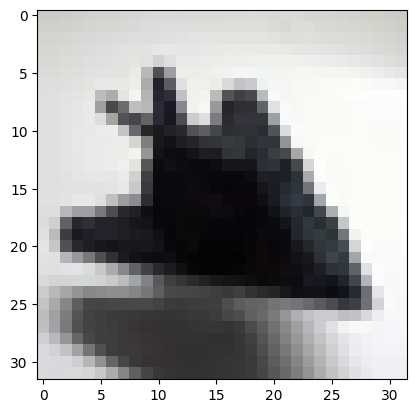

In [14]:
img,label=dataset[0]
show_examples(img,label)

Label :  airplane (0)


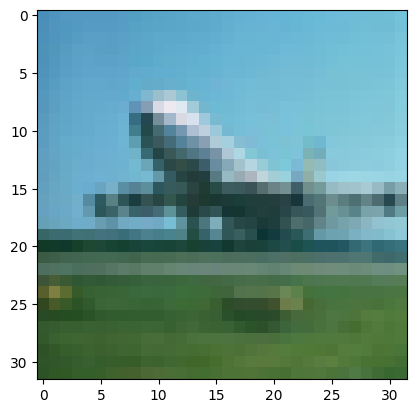

In [15]:
img,label=dataset[100]
show_examples(img,label)

Label :  airplane (0)


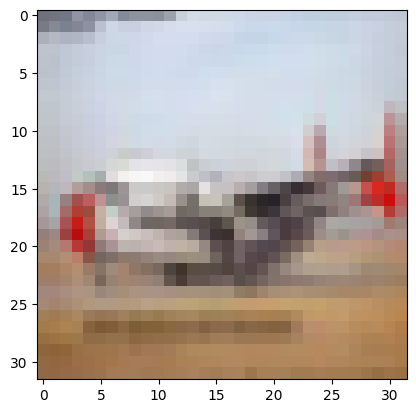

In [16]:
show_examples(*dataset[1099])

### Training and Validation Datasets
- Training set
- Validation set
- Test set

In [17]:
random_seed = 42
torch.manual_seed(random_seed)

In [18]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds,val_ds = random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(45000, 5000)

In [19]:
from torch.utils.data.dataloader import DataLoader
batch_size = 128

# if we see the traning size decrease the keep high batch size ( double batch size)

In [21]:
# train and validation
train_dl = DataLoader(train_ds,batch_size , shuffle = True , num_workers=4,pin_memory=True)
val_dl = DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [24]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images , labels in dl:
    fig ,ax = plt.subplots(figsize=(12,6))
    ax.set_xticks([]);
    ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

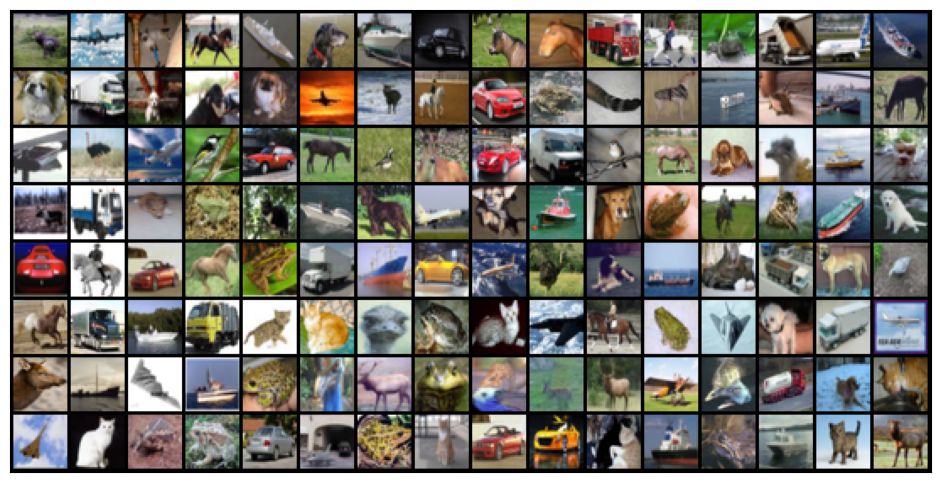

In [25]:
show_batch(train_dl)

In [30]:
def apply_kernel(images,kernel):
  ri,ci =images.shape
  rk,ck= kernel.shape
  ro,co = ri-rk+1,ci-ck+1 #image dimensions

  output = torch.zeros([ro,co])

  for i in range(ro):
    for j in range(co):
      output[i,j] = torch.sum(images[i:i+rk,j:j+ck] * kernel)
  return output

In [31]:
sample_image_test = torch.tensor([
    [3,3,2,1,0],
    [0,0,1,3,1],
    [3,1,2,2,3],
    [2,0,0,2,2],
    [2,0,0,0,1]
],dtype=torch.float32)

sample_kernel = torch.tensor(
    [
        [0,1,2],
        [2,2,0],
        [0,1,2]
    ],dtype=torch.float32
)

# call the functions
apply_kernel(sample_image_test,sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

## use
- padding use to keep the output size is similar to the input size
- stride : Often when running a convoulation layer, you want an output with lower size then the input . This is commonplace in convolutional NN , where the Size of the **Spatial** dimensions are reduced when **incresing** the number of the channels . One way of accomplishing this is by using a pooling layer (eg: take the average/ max of every 2x2 grid to reduce each spatial dimensions in half )

- Yet another way to do this is to use a **Stride**  

### New Section
-**Parameter sharing and spatial invariance** : the features learned by a kernel in one part of the image can be used to detect similar pattern in a different part of another image

## How works in single layer

In [32]:
import torch.nn as nn
import torch.nn.functional as F

In [33]:
conv = nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1)

In [50]:
for images,labels in train_dl:
  print('images.shape = ',images.shape) #  out.shapes =  torch.Size([128, 3, 32, 32])
  out = conv(images)
  print('out.shapes = ',out.shape) # out.shapes =  torch.Size([128, 8, 32, 32])
  break

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


images.shape =  torch.Size([128, 3, 32, 32])
out.shapes =  torch.Size([128, 8, 32, 32])


### max pool add


In [37]:
pool = nn.MaxPool2d(2,2)


In [41]:
for images,labels in train_dl:
  print('images.shape = ',images.shape)         #images.shape =  torch.Size([128, 3, 32, 32])
  out = conv(images)
  print('out.shapes = ',out.shape)              # out.shapes =  torch.Size([128, 8, 32, 32])
  pool_out = pool(out)
  print('pool_out.shapes = ',pool_out.shape)    # pool_out.shapes =  torch.Size([128, 8, 16, 16])
  break

images.shape =  torch.Size([128, 3, 32, 32])
out.shapes =  torch.Size([128, 8, 32, 32])
pool_out.shapes =  torch.Size([128, 8, 16, 16])


### visualize the something

In [42]:
conv.weight.shape

torch.Size([8, 3, 3, 3])

In [43]:
conv.weight[0,0]

tensor([[ 0.1560,  0.0757,  0.0781],
        [-0.1201, -0.0989,  0.0508],
        [ 0.1701,  0.0643,  0.1109]], grad_fn=<SelectBackward0>)

In [45]:
conv.weight[1,0]

tensor([[-0.0803, -0.1281,  0.0853],
        [ 0.1624,  0.0438,  0.1575],
        [-0.0313, -0.1402,  0.0774]], grad_fn=<SelectBackward0>)

In [46]:
conv.weight[0] # this 3 produce R G B and channel 1

tensor([[[ 0.1560,  0.0757,  0.0781],
         [-0.1201, -0.0989,  0.0508],
         [ 0.1701,  0.0643,  0.1109]],

        [[-0.0033,  0.1575, -0.1299],
         [ 0.1855,  0.0587, -0.1072],
         [ 0.1864,  0.0403,  0.0994]],

        [[ 0.1686, -0.1169, -0.1352],
         [ 0.1361, -0.0403, -0.1402],
         [ 0.0297, -0.1356,  0.1519]]], grad_fn=<SelectBackward0>)

In [47]:
conv.weight

Parameter containing:
tensor([[[[ 0.1560,  0.0757,  0.0781],
          [-0.1201, -0.0989,  0.0508],
          [ 0.1701,  0.0643,  0.1109]],

         [[-0.0033,  0.1575, -0.1299],
          [ 0.1855,  0.0587, -0.1072],
          [ 0.1864,  0.0403,  0.0994]],

         [[ 0.1686, -0.1169, -0.1352],
          [ 0.1361, -0.0403, -0.1402],
          [ 0.0297, -0.1356,  0.1519]]],


        [[[-0.0803, -0.1281,  0.0853],
          [ 0.1624,  0.0438,  0.1575],
          [-0.0313, -0.1402,  0.0774]],

         [[-0.0561, -0.0485, -0.1848],
          [ 0.0140, -0.0902, -0.0311],
          [ 0.0133, -0.1269,  0.1138]],

         [[ 0.1813, -0.0442, -0.1534],
          [ 0.0476, -0.0057, -0.1522],
          [ 0.0428,  0.1135,  0.0449]]],


        [[[ 0.0477,  0.1006,  0.1239],
          [-0.0219,  0.0941, -0.1691],
          [ 0.1094,  0.0677, -0.1759]],

         [[ 0.0430, -0.1489,  0.1766],
          [-0.1772, -0.0293,  0.1363],
          [ 0.0023,  0.0150,  0.0071]],

         [[ 0.0570,  0

## Simple model create using Torch

In [49]:
# we manually create avobe the things but there is simpler way we can achive it
#
#
simple_model = nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(2,2)
)

In [51]:
for images,labels in train_dl:
  print('images.shape = ',images.shape) #  out.shapes =  torch.Size([128, 3, 32, 32])
  out = simple_model(images)
  print('out.shapes = ',out.shape) # out.shapes =  torch.Size([128, 8, 16, 16])
  break

images.shape =  torch.Size([128, 3, 32, 32])
out.shapes =  torch.Size([128, 8, 16, 16])


## base class for any image classification

In [52]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [53]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
                              # input 3 * 32 * 32 : here 3 channels RGB image output in 32 channels
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
                              # output : 32 * 32 * 32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(),
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))

    def forward(self, xb):
        return self.network(xb)

# it has 6 Conv2D and 3 linear model = 9 layer nural networks

In [54]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [56]:
for images,labels in train_dl:
  print('images.shape = ',images.shape) #  out.shapes =  torch.Size([128, 3, 32, 32])
  out = model(images)
  print('out.shapes = ',out.shape) # out.shapes =  torch.Size([128, 8, 16, 16])
  print('out[0] = = ',out[0])
  break

images.shape =  torch.Size([128, 3, 32, 32])
out.shapes =  torch.Size([128, 10])
out[0] = =  tensor([-0.0058, -0.0066, -0.0180, -0.0474, -0.0298, -0.0416,  0.0129,  0.0294,
        -0.0072, -0.0107], grad_fn=<SelectBackward0>)


### links

- 1 https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
- 2 https://sgugger.github.io/convolution-in-depth.html
-3 https://jovian.com/venkatesh-vran/05-stl10-cnn